# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [85]:
import requests
import json
#vem como um dicionario no formato json
cotacoes =  requests.get('https://economia.awesomeapi.com.br/json/all')
#converter para dicionario em python
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.99', 'low': '4.9855', 'varBid': '0.0029', 'pctChange': '0.06', 'bid': '4.9891', 'ask': '4.99', 'timestamp': '1711574529', 'create_date': '2024-03-27 18:22:09'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.01', 'low': '4.97', 'varBid': '-0.01', 'pctChange': '-0.2', 'bid': '4.85', 'ask': '5.15', 'timestamp': '1711568100', 'create_date': '2024-03-27 16:35:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.6706', 'low': '3.6706', 'varBid': '0', 'pctChange': '0', 'bid': '3.6679', 'ask': '3.6733', 'timestamp': '1711574319', 'create_date': '2024-03-27 18:18:39'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.3043', 'low': '6.2998', 'varBid': '0.0016', 'pctChange': '0.03', 'bid': '6.3018', 'ask': '6.3056', 'timestamp': '1711574544', 'create_date'

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [86]:
print('Dolar: {} '.format(cotacoes_dic['USD']['bid']))
print('Euro: {} '.format(cotacoes_dic['EUR']['bid']))
print('Bitcoin: {} '.format(cotacoes_dic['BTC']['bid']))


Dolar: 4.9891 
Euro: 5.3896 
Bitcoin: 346670 


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [87]:
cotacoes_dolar30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar_dic = cotacoes_dolar30d.json()
#percorrer o dicionario (criar lista) list comprehension
lista_cotacoes_dolar = [float(item['bid']) for item in cotacoes_dolar_dic]
print(lista_cotacoes_dolar)


[4.9896, 4.9767, 4.9733, 4.9993, 5.0005, 4.9736, 4.9663, 5.0339, 5.0304, 4.9954, 4.9949, 4.9954, 4.9942, 4.971, 4.9695, 4.9783, 4.9825, 4.9805, 4.935, 4.9446, 4.9581, 4.9454, 4.9541, 4.9541, 4.9703, 4.9675, 4.9335, 4.9799, 4.9938, 4.9938]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [ ]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/BTC-BRL/100?start_date=20220101&end_date=20240327')

cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]

lista_cotacoes_btc.reverse() #inverter toda a lista
print(lista_cotacoes_btc)
print(len(lista_cotacoes_btc))





#### Gráfico com as cotações do BitCoin

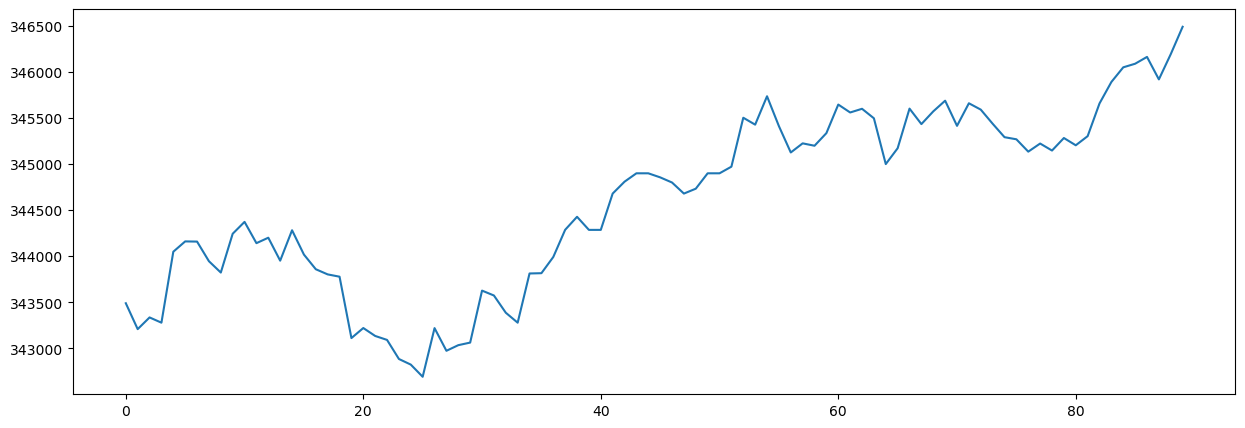

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)
plt.show()